# Deep Learning Project
## Mask detection

Group members:
- Ana Marta Silva--- m20200971
- Gustavo Tourinho --- m20180846
- Lorenzo Pigozzi	--- m20200745
- Salim Bouaichi --- m20200547




### Steps
1.	Importing libraries and setting the directions 
2.	Modeling
3.	Assessments

# 1. Importing libraries and setting the directions <a class="anchor" id="1"></a>

In [1]:
from numpy.random import seed
seed(50)

import math
!pip install h5py
#! pip install tensorflow 
import tensorflow
from tensorflow.random import set_seed
tensorflow.random.set_seed(50)
# importing needed libraries
#%tensorflow_version 1.x
import pandas as pd
import numpy as np
import keras
import os, shutil
import io
import seaborn as sns


# keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks 
from keras import models   
from keras.applications import VGG19
from keras import callbacks, layers

# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

You should consider upgrading via the 'C:\Users\marta\anaconda3\python.exe -m pip install --upgrade pip' command.


# Directions Google Colab

In [2]:
# # # downloading the pictures
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls '/content/gdrive'  # take a look at the Google Drive content

Mounted at /content/gdrive
MyDrive


In [3]:
# # checking the GPU usage
# tensorflow.test.gpu_device_name()

'/device:GPU:0'

# 2. Modeling

In [12]:
# defining the functions
def confusion_matrix(data_set, predictions):
    # confusion matrix
    print('Confusion matrix')
    print(confusion_matrix(data_set.classes, predictions))

def classification_report(data_set, predictions):
    # classification report
    print('Classification Report')
    target_names = ['No Mask', 'Mask']
    print(classification_report(data_set.classes, predictions, target_names=target_names))
    
def accuracy_plots(hist):
    # plotting
    # displaying the accuracy and loss over the training epochs
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(1, len(acc) +1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

## 2.1. Model I - Batch Size = 1

In [2]:
# Sequential model | Create linear stack of layers
model_basic = Sequential()

# Convolutional layer | Conv2D
model_basic.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_basic.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_basic.add(Flatten())
# Hidden layer
model_basic.add(Dense(32, activation='relu'))
# Output layer
model_basic.add(Dense(1, activation='sigmoid'))

In [3]:
# compiling the model
model_basic.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# visualizing the model structure
model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5607456   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
_________________________________________________________________


In [5]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [6]:
# importing the images

batch_size = 1

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_basic=model_basic.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 261/1979 [==>...........................] - ETA: 51s - loss: 2.6406 - accuracy: 0.6430

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1979/1979 [==============================] - 60s 29ms/step - loss: 0.9940 - accuracy: 0.7124 - val_loss: 0.4547 - val_accuracy: 0.7000
Epoch 2/20
1979/1979 [==============================] - 58s 29ms/step - loss: 0.2638 - accuracy: 0.9079 - val_loss: 0.6945 - val_accuracy: 0.7000
Epoch 3/20
1979/1979 [==============================] - 57s 29ms/step - loss: 0.0876 - accuracy: 0.9791 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 4/20
1979/1979 [==============================] - 57s 29ms/step - loss: 0.0250 - accuracy: 0.9935 - val_loss: 0.1227 - val_accuracy: 0.9000
Epoch 5/20
1979/1979 [==============================] - 58s 29ms/step - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.2432 - val_accuracy: 0.9000
Epoch 6/20
1979/1979 [==============================] - 58s 29ms/step - loss: 0.0190 - accuracy: 0.9963 - val_loss: 0.0774 - val_accuracy: 0.9000
Epoch 7/20
1979/1979 [==============================] - 57s 29ms/step - loss: 0.0478 - accuracy: 0.9880 - val_loss: 1.2100 - val_accura

In [ ]:
vis_basic = pd.DataFrame(hist_basic.history)
vis_basic

,loss,accuracy,val_loss,val_accuracy
0,5.981459e-01,0.763012,0.454675,0.7
1,2.541196e-01,0.909550,0.694455,0.7
2,7.857021e-02,0.977767,0.015158,1.0
3,3.554692e-02,0.989389,0.122737,0.9
4,3.469722e-02,0.992926,0.243179,0.9
5,1.692786e-02,0.996968,0.077354,0.9
6,3.120883e-02,0.991410,1.209985,0.7
7,6.924726e-03,0.997979,3.291127,0.6
8,1.177410e-02,0.995452,0.599143,0.8
9,3.682832e-02,0.996463,2.418461,0.7


In [ ]:
# prediction
Y_pred_basic = model_basic.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_basic = (Y_pred_basic>0.5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
Y_pred_basic.shape

(422, 1)

In [ ]:
validation_set.classes.shape

(422,)

##### Model assessment

In [ ]:
confusion_matrix(validation_set, Y_pred_basic)

Confusion matrix
[[182  29]
 [ 40 171]]


In [ ]:
classification_report(validation_set, Y_pred_basic)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.82      0.86      0.84       211
        Mask       0.85      0.81      0.83       211

    accuracy                           0.84       422
   macro avg       0.84      0.84      0.84       422
weighted avg       0.84      0.84      0.84       422



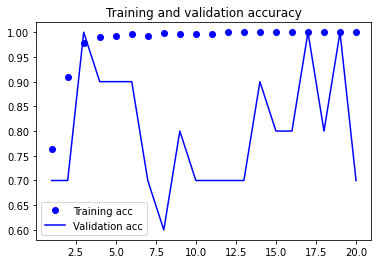

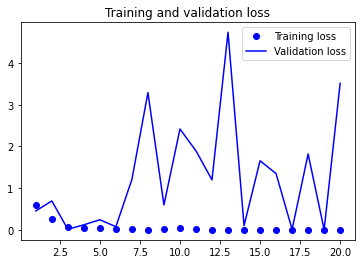

In [ ]:
accuracy_plots(hist_basic)

## 2.1.2 Model I.2 - 2 Convulotional layers, Batch Size = 1

In [ ]:
# Sequential model | Create linear stack of layers
model_basic1 = Sequential()

# Convolutional layer | Conv2D
model_basic1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_basic1.add(MaxPooling2D((2, 2)))
model_basic1.add(Conv2D(64, (3, 3), activation='relu'))
model_basic1.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_basic1.add(Flatten())
# Hidden layer
model_basic1.add(Dense(32, activation='relu'))
# Output layer
model_basic1.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_basic1.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_basic1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2654240   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [8]:
# importing the images

batch_size = 1

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_basic1=model_basic1.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


  92/1979 [>.............................] - ETA: 1:13 - loss: 0.9002 - accuracy: 0.5277

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1979/1979 [==============================] - 60s 30ms/step - loss: 0.6309 - accuracy: 0.6817 - val_loss: 0.5188 - val_accuracy: 0.7000
Epoch 2/20
1979/1979 [==============================] - 58s 29ms/step - loss: 0.3068 - accuracy: 0.8709 - val_loss: 0.7535 - val_accuracy: 0.8000
Epoch 3/20
1979/1979 [==============================] - 59s 30ms/step - loss: 0.1598 - accuracy: 0.9424 - val_loss: 0.4668 - val_accuracy: 0.9000
Epoch 4/20
1979/1979 [==============================] - 59s 30ms/step - loss: 0.0661 - accuracy: 0.9824 - val_loss: 1.1788 - val_accuracy: 0.8000
Epoch 5/20
1979/1979 [==============================] - 59s 30ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.6042 - val_accuracy: 0.9000
Epoch 6/20
1979/1979 [==============================] - 59s 30ms/step - loss: 0.0089 - accuracy: 0.9987 - val_loss: 2.4249 - val_accuracy: 0.9000
Epoch 7/20
1979/1979 [==============================] - 59s 30ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 1.6127 - val_accura

In [ ]:
vis_basic1 = pd.DataFrame(hist_basic1.history)
vis_basic1

,loss,accuracy,val_loss,val_accuracy
0,0.546284,0.737746,0.518772,0.7
1,0.314125,0.869631,0.753529,0.8
2,0.168429,0.936837,0.466824,0.9
3,0.086725,0.970187,1.178838,0.8
4,0.053863,0.985346,0.604178,0.9
5,0.005785,0.998989,2.424906,0.9
6,0.024920,0.991915,1.612706,0.8
7,0.028556,0.991915,0.917557,0.8
8,0.046912,0.986357,6.459077,0.6
9,0.010663,0.996968,2.559642,0.8


In [ ]:
# predictions
Y_pred_basic1 = model_basic1.predict_generator(validation_set, len(validation_set))
# changing the result as True and False
Y_pred_basic1 = (Y_pred_basic1>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_basic1)

Confusion matrix
[[176  35]
 [ 57 154]]


In [ ]:
classification_report(validation_set, Y_pred_basic1)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.76      0.83      0.79       211
        Mask       0.81      0.73      0.77       211

    accuracy                           0.78       422
   macro avg       0.79      0.78      0.78       422
weighted avg       0.79      0.78      0.78       422



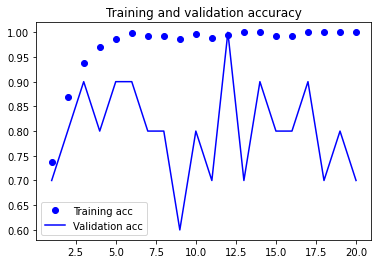

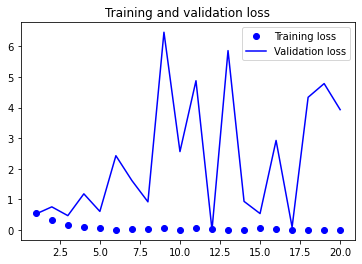

In [ ]:
accuracy_plots(hist_basic1)

## 2.2. Model Model II - Bach Size = 23

In [ ]:
# Sequential model | Create linear stack of layers
model_basic_2 = Sequential()

# Convolutional layer | Conv2D
model_basic_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_basic_2.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_basic_2.add(Flatten())
# Hidden layer
model_basic_2.add(Dense(32, activation='relu'))
# Output layer
model_basic_2.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_basic_2.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_basic_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [9]:
# importing the images

batch_size = 23

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_basic_2=model_basic_2.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 6/86 [=>............................] - ETA: 44s - loss: 2.9488 - accuracy: 0.5229

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


86/86 [==============================] - 112s 1s/step - loss: 1.5970 - accuracy: 0.6191 - val_loss: 0.4242 - val_accuracy: 0.8391
Epoch 2/20
86/86 [==============================] - 76s 887ms/step - loss: 0.2821 - accuracy: 0.8935 - val_loss: 0.4142 - val_accuracy: 0.8087
Epoch 3/20
86/86 [==============================] - 58s 681ms/step - loss: 0.1423 - accuracy: 0.9610 - val_loss: 0.2573 - val_accuracy: 0.8870
Epoch 4/20
86/86 [==============================] - 54s 628ms/step - loss: 0.0629 - accuracy: 0.9887 - val_loss: 0.3256 - val_accuracy: 0.8870
Epoch 5/20
86/86 [==============================] - 52s 609ms/step - loss: 0.0325 - accuracy: 0.9948 - val_loss: 0.3863 - val_accuracy: 0.8478
Epoch 6/20
86/86 [==============================] - 53s 606ms/step - loss: 0.0635 - accuracy: 0.9899 - val_loss: 0.3573 - val_accuracy: 0.9000
Epoch 7/20
86/86 [==============================] - 51s 602ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.2937 - val_accuracy: 0.9304
Epoch 8/20
8

In [ ]:
vis_basic_2 = pd.DataFrame(hist_basic_2.history)
vis_basic_2

,loss,accuracy,val_loss,val_accuracy
0,0.862475,0.721370,0.424211,0.839130
1,0.260304,0.896728,0.414241,0.808696
2,0.138230,0.962679,0.257269,0.886957
3,0.055786,0.991309,0.325626,0.886957
4,0.069016,0.976994,0.386263,0.847826
5,0.044227,0.992331,0.357263,0.900000
6,0.011064,1.000000,0.293658,0.930435
7,0.005671,1.000000,0.380880,0.895652
8,0.003580,1.000000,0.353304,0.908696
9,0.002607,1.000000,0.233525,0.947826


In [ ]:
# prediction
Y_pred_basic_2 = model_basic_2.predict_generator(validation_set, len(validation_set)) 

# changing the result as True and False
Y_pred_basic_2 = (Y_pred_basic_2>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_basic_2)

Confusion matrix
[[187  24]
 [ 39 172]]


In [ ]:
classification_report(validation_set, Y_pred_basic_2)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.89      0.86       211
        Mask       0.88      0.82      0.85       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



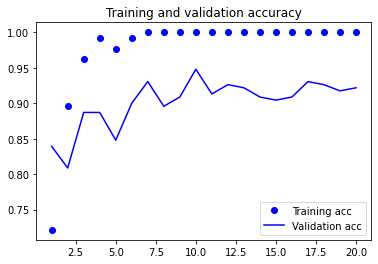

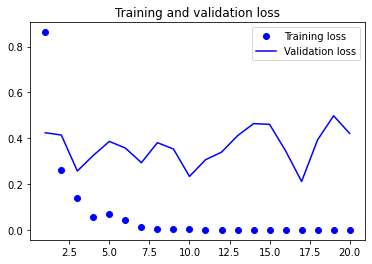

In [ ]:
accuracy_plots(hist_basic_2)

## 2.3. Model Model III - Bach Size = 32

In [ ]:
# Sequential model | Create linear stack of layers
model_basic_3 = Sequential()

# Convolutional layer | Conv2D
model_basic_3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_basic_3.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_basic_3.add(Flatten())
# Hidden layer
model_basic_3.add(Dense(32, activation='relu'))
# Output layer
model_basic_3.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_basic_3.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_basic_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [10]:
# importing the images

batch_size = 32

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_basic_3=model_basic_3.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
29/61 [=============>................] - ETA: 28s - loss: 3.8378 - accuracy: 0.5516

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


61/61 [==============================] - 53s 868ms/step - loss: 2.6459 - accuracy: 0.6240 - val_loss: 0.4101 - val_accuracy: 0.8219
Epoch 2/20
61/61 [==============================] - 52s 852ms/step - loss: 0.2923 - accuracy: 0.8714 - val_loss: 0.3194 - val_accuracy: 0.8531
Epoch 3/20
61/61 [==============================] - 52s 852ms/step - loss: 0.1113 - accuracy: 0.9700 - val_loss: 0.3145 - val_accuracy: 0.8719
Epoch 4/20
61/61 [==============================] - 52s 857ms/step - loss: 0.0655 - accuracy: 0.9897 - val_loss: 0.3247 - val_accuracy: 0.8750
Epoch 5/20
61/61 [==============================] - 52s 857ms/step - loss: 0.0260 - accuracy: 0.9991 - val_loss: 0.2632 - val_accuracy: 0.9156
Epoch 6/20
61/61 [==============================] - 52s 845ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.2598 - val_accuracy: 0.9187
Epoch 7/20
61/61 [==============================] - 52s 856ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.2632 - val_accuracy: 0.8938
Epoch 8/20

In [ ]:
vis_basic_3 = pd.DataFrame(hist_basic_3.history)
vis_basic_3

,loss,accuracy,val_loss,val_accuracy
0,1.268866,0.722650,0.410095,0.821875
1,0.282303,0.877761,0.319358,0.853125
2,0.121883,0.962506,0.314517,0.871875
3,0.056266,0.992828,0.324663,0.875000
4,0.028067,0.997946,0.263159,0.915625
5,0.014332,0.999486,0.259808,0.918750
6,0.009166,1.000000,0.263160,0.893750
7,0.005838,1.000000,0.322176,0.900000
8,0.003756,1.000000,0.314367,0.909375
9,0.002657,1.000000,0.281216,0.925000


In [ ]:
# prediction
Y_pred_basic_3 = model_basic_3.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_basic_3 = (Y_pred_basic_3>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_basic_3)

Confusion matrix
[[193  18]
 [ 46 165]]


In [ ]:
classification_report(validation_set, Y_pred_basic_3)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.81      0.91      0.86       211
        Mask       0.90      0.78      0.84       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



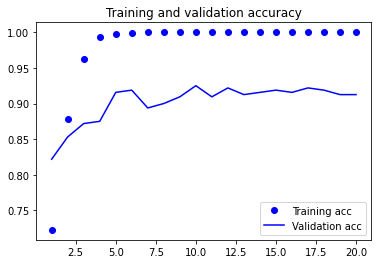

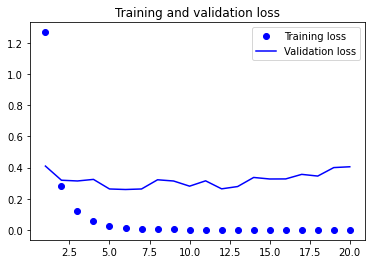

In [ ]:
accuracy_plots(hist_basic_3)

## 2.3. Model IV - Batch Size = 46

In [ ]:
# Sequential model | Create linear stack of layers
model_basic_4 = Sequential()

# Convolutional layer | Conv2D
model_basic_4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_basic_4.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_basic_4.add(Flatten())
# Hidden layer
model_basic_4.add(Dense(32, activation='relu'))
# Output layer
model_basic_4.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_basic_4.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_basic_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                5607456   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [11]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_basic_4=model_basic_4.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/43 [============>.................] - ETA: 24s - loss: 5.2343 - accuracy: 0.5307

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 53s 1s/step - loss: 3.5023 - accuracy: 0.5772 - val_loss: 0.4938 - val_accuracy: 0.7915
Epoch 2/20
43/43 [==============================] - 52s 1s/step - loss: 0.3282 - accuracy: 0.8707 - val_loss: 0.4137 - val_accuracy: 0.8104
Epoch 3/20
43/43 [==============================] - 52s 1s/step - loss: 0.1741 - accuracy: 0.9540 - val_loss: 0.3359 - val_accuracy: 0.8697
Epoch 4/20
43/43 [==============================] - 52s 1s/step - loss: 0.0779 - accuracy: 0.9835 - val_loss: 0.5276 - val_accuracy: 0.8199
Epoch 5/20
43/43 [==============================] - 53s 1s/step - loss: 0.0472 - accuracy: 0.9949 - val_loss: 0.4004 - val_accuracy: 0.8602
Epoch 6/20
43/43 [==============================] - 53s 1s/step - loss: 0.0401 - accuracy: 0.9947 - val_loss: 0.3296 - val_accuracy: 0.8863
Epoch 7/20
43/43 [==============================] - 52s 1s/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.3653 - val_accuracy: 0.8815
Epoch 8/20
43/43 [=============

In [ ]:
vis_basic_4 = pd.DataFrame(hist_basic_4.history)
vis_basic_4

,loss,accuracy,val_loss,val_accuracy
0,1.610065,0.657527,0.493772,0.791469
1,0.311054,0.874806,0.413656,0.810427
2,0.144122,0.963270,0.335858,0.869668
3,0.075040,0.983445,0.527582,0.819905
4,0.043320,0.995344,0.400442,0.860190
5,0.032074,0.995861,0.329632,0.886256
6,0.010096,1.000000,0.365280,0.881517
7,0.006612,1.000000,0.363646,0.890995
8,0.004092,1.000000,0.342558,0.900474
9,0.003150,1.000000,0.393567,0.888626


In [ ]:
# predictions
Y_pred_basic_4 = model_basic_4.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_basic_4 = (Y_pred_basic_4>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_basic_4)

Confusion matrix
[[191  20]
 [ 42 169]]


In [ ]:
classification_report(validation_set, Y_pred_basic_4)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.82      0.91      0.86       211
        Mask       0.89      0.80      0.84       211

    accuracy                           0.85       422
   macro avg       0.86      0.85      0.85       422
weighted avg       0.86      0.85      0.85       422



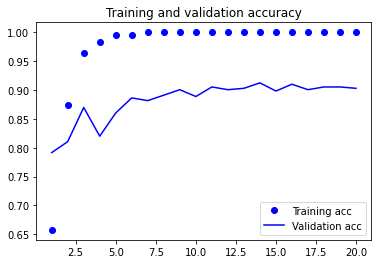

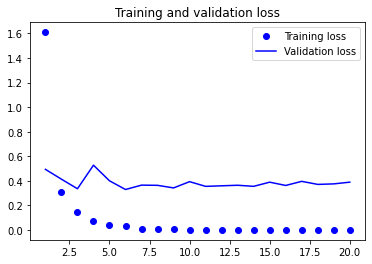

In [ ]:
accuracy_plots(hist_basic_4)

#We will choose batch size=46 in order to reduce the spikes

## 3.1. Model Model V - Data augmentation 

In [ ]:
# Sequential model | Create linear stack of layers
model_5 = Sequential()

# Convolutional layer | Conv2D
model_5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_5.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_5.add(Flatten())
# Hidden layer
model_5.add(Dense(32, activation='relu'))
# Output layer
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_5.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5607456   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,608,385
Trainable params: 5,608,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_5=model_5.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
43/43 [==============================] - 63s 1s/step - loss: 2.2492 - accuracy: 0.5589 - val_loss: 0.4841 - val_accuracy: 0.7749
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 0.5096 - accuracy: 0.7518 - val_loss: 0.4720 - val_accuracy: 0.8009
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.4778 - accuracy: 0.7566 - val_loss: 0.4442 - val_accuracy: 0.8033
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.3991 - accuracy: 0.8002 - val_loss: 0.4421 - val_accuracy: 0.7986
Epoch 5/20
43/43 [==============================] - 61s 1s/step - loss: 0.3560 - accuracy: 0.8528 - val_loss: 0.4265 - val_accuracy: 0.8152
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 0.3348 - accuracy: 0.8536 - val_loss: 0.4443 - val_accuracy: 0.8033
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.3409 - accuracy: 0.8565 - val_loss: 0.4541 - val_accuracy: 0.8009
Epoch 8/20
43/43 [==

In [ ]:
vis_model_5 = pd.DataFrame(hist_model_5.history)
vis_model_5

,loss,accuracy,val_loss,val_accuracy
0,1.311526,0.635282,0.484147,0.774882
1,0.500728,0.754268,0.472037,0.800948
2,0.454377,0.770823,0.444235,0.803318
3,0.397440,0.814278,0.442086,0.798578
4,0.351842,0.849457,0.426496,0.815166
5,0.335826,0.858769,0.444318,0.803318
6,0.350395,0.853595,0.454126,0.800948
7,0.330855,0.861355,0.397648,0.831754
8,0.296344,0.875323,0.400832,0.836493
9,0.280427,0.878945,0.393090,0.841232


In [ ]:
# predictions
Y_pred_model_5 = model_5.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_model_5 = (Y_pred_model_5>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
validation_set.classes.shape

(422,)

##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_5)

Confusion matrix
[[195  16]
 [ 39 172]]


In [ ]:
classification_report(validation_set, Y_pred_model_5)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.92      0.88       211
        Mask       0.91      0.82      0.86       211

    accuracy                           0.87       422
   macro avg       0.87      0.87      0.87       422
weighted avg       0.87      0.87      0.87       422



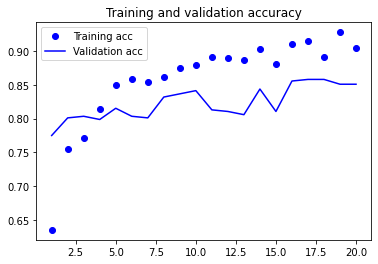

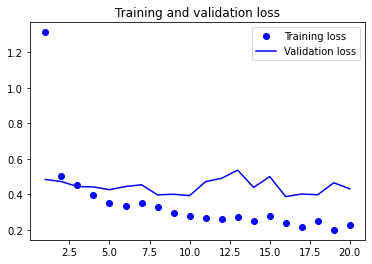

In [ ]:
accuracy_plots(hist_model_5)

## 4.1. Model VI - Nº of filters=24

In [ ]:
# Sequential model | Create linear stack of layers
model_6 = Sequential()

# Convolutional layer | Conv2D
model_6.add(Conv2D(24, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_6.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_6.add(Flatten())
# model_10.add(Dropout(0.25))
# Hidden layer
model_6.add(Dense(32, activation='relu'))
# Output layer
model_6.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_6.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 24)      672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 24)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131424)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4205600   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,206,305
Trainable params: 4,206,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_6=model_6.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 1092s 25s/step - loss: 1.5574 - accuracy: 0.5449 - val_loss: 0.5583 - val_accuracy: 0.7938
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.5544 - accuracy: 0.7490 - val_loss: 0.4968 - val_accuracy: 0.7275
Epoch 3/20
43/43 [==============================] - 59s 1s/step - loss: 0.4848 - accuracy: 0.7629 - val_loss: 0.4010 - val_accuracy: 0.8246
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.4286 - accuracy: 0.7997 - val_loss: 0.4077 - val_accuracy: 0.8199
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.4007 - accuracy: 0.8132 - val_loss: 0.3956 - val_accuracy: 0.8199
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 0.3737 - accuracy: 0.8316 - val_loss: 0.4279 - val_accuracy: 0.7891
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.4118 - accuracy: 0.7848 - val_loss: 0.4055 - val_accuracy: 0.8199
Epoch 8/20
43/43 [==========

In [ ]:
vis_model_6 = pd.DataFrame(hist_model_6.history)
vis_model_6

,loss,accuracy,val_loss,val_accuracy
0,1.013713,0.612519,0.558341,0.793839
1,0.531617,0.758407,0.496756,0.727488
2,0.462478,0.784790,0.401029,0.824645
3,0.433873,0.792033,0.407669,0.819905
4,0.392263,0.816865,0.395558,0.819905
5,0.384045,0.827212,0.427879,0.789100
6,0.395977,0.815313,0.405457,0.819905
7,0.363455,0.840145,0.389975,0.836493
8,0.342017,0.847905,0.387485,0.824645
9,0.363120,0.840145,0.397610,0.815166


In [ ]:
# predictions

Y_pred_model_6 = model_6.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_model_6 = (Y_pred_model_6>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_6)

Confusion matrix
[[171  40]
 [ 22 189]]


In [ ]:
classification_report(validation_set, Y_pred_model_6)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.89      0.81      0.85       211
        Mask       0.83      0.90      0.86       211

    accuracy                           0.85       422
   macro avg       0.86      0.85      0.85       422
weighted avg       0.86      0.85      0.85       422



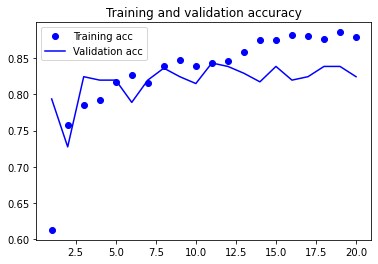

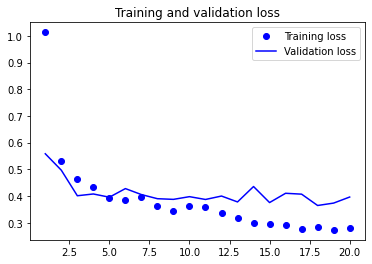

In [ ]:
accuracy_plots(hist_model_6)

## 4.2. Model VII - Nº of filters=64

In [ ]:
# Sequential model | Create linear stack of layers
model_7 = Sequential()

# Convolutional layer | Conv2D
model_7.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_7.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_7.add(Flatten())
# model_11.add(Dropout(0.25))
# Hidden layer
model_7.add(Dense(32, activation='relu'))
# Output layer
model_7.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_7.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                11214880  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 11,216,705
Trainable params: 11,216,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_model_7=model_7.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
11/43 [======>.......................] - ETA: 39s - loss: 4.1644 - accuracy: 0.4843

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 2.2285 - accuracy: 0.5910 - val_loss: 0.4334 - val_accuracy: 0.8246
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.4330 - accuracy: 0.7973 - val_loss: 0.3951 - val_accuracy: 0.8246
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.3921 - accuracy: 0.8305 - val_loss: 0.4137 - val_accuracy: 0.7938
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.3463 - accuracy: 0.8572 - val_loss: 0.5292 - val_accuracy: 0.7820
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.3326 - accuracy: 0.8604 - val_loss: 0.3707 - val_accuracy: 0.8412
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 0.2929 - accuracy: 0.8742 - val_loss: 0.3946 - val_accuracy: 0.8412
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.3054 - accuracy: 0.8696 - val_loss: 0.3830 - val_accuracy: 0.8507
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_7 = pd.DataFrame(hist_model_7.history)
vis_model_7

,loss,accuracy,val_loss,val_accuracy
0,1.124506,0.677703,0.433381,0.824645
1,0.439261,0.796689,0.395054,0.824645
2,0.396536,0.832385,0.413718,0.793839
3,0.357588,0.850491,0.529204,0.781991
4,0.344192,0.846870,0.370685,0.841232
5,0.319384,0.869115,0.394557,0.841232
6,0.287942,0.886187,0.383030,0.850711
7,0.280952,0.885670,0.463554,0.798578
8,0.261075,0.888774,0.356261,0.857820
9,0.244056,0.906363,0.395545,0.845972


In [ ]:
# predictions

Y_pred_model_7 = model_7.predict_generator(test_set, len(validation_set))

# changing the result as True and False
Y_pred_model_7 = (Y_pred_model_7>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Model assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_7)

Confusion matrix
[[151  60]
 [ 19 192]]


In [ ]:
classification_report(validation_set, Y_pred_model_7)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.89      0.72      0.79       211
        Mask       0.76      0.91      0.83       211

    accuracy                           0.81       422
   macro avg       0.83      0.81      0.81       422
weighted avg       0.83      0.81      0.81       422



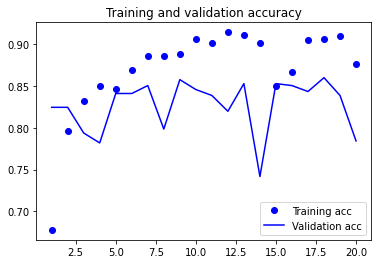

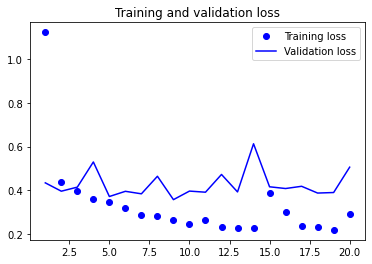

In [ ]:
accuracy_plots(hist_model_7)

## 4.3. Model VIII - Nº of filters=96

In [ ]:
# Sequential model | Create linear stack of layers
model_8 = Sequential()

# Convolutional layer | Conv2D
model_8.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_8.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_8.add(Flatten())
# model_12.add(Dropout(0.25))
# Hidden layer
model_8.add(Dense(32, activation='relu'))
# Output layer
model_8.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_8.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                16822304  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 16,825,025
Trainable params: 16,825,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_model_8=model_8.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 8/43 [====>.........................] - ETA: 50s - loss: 8.3994 - accuracy: 0.5068

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 3.9472 - accuracy: 0.5164 - val_loss: 0.5697 - val_accuracy: 0.7820
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.5588 - accuracy: 0.7624 - val_loss: 0.4638 - val_accuracy: 0.7962
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.5210 - accuracy: 0.7548 - val_loss: 0.4141 - val_accuracy: 0.8152
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.4417 - accuracy: 0.7958 - val_loss: 0.5539 - val_accuracy: 0.7701
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.4549 - accuracy: 0.7946 - val_loss: 0.4005 - val_accuracy: 0.8175
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 0.3787 - accuracy: 0.8453 - val_loss: 0.3808 - val_accuracy: 0.8365
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.3575 - accuracy: 0.8430 - val_loss: 0.4232 - val_accuracy: 0.7891
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_8 = pd.DataFrame(hist_model_8.history)
vis_model_8

,loss,accuracy,val_loss,val_accuracy
0,1.878359,0.548888,0.569654,0.781991
1,0.546468,0.757889,0.463818,0.796209
2,0.493715,0.769788,0.414145,0.815166
3,0.434890,0.806518,0.553864,0.770142
4,0.437892,0.809622,0.400505,0.817536
5,0.375410,0.841179,0.380775,0.836493
6,0.373495,0.833937,0.423150,0.789100
7,0.348005,0.851009,0.386484,0.838863
8,0.343611,0.858251,0.387505,0.808057
9,0.334693,0.857734,0.367788,0.819905


In [ ]:
# predictions

Y_pred_model_8 = model_8.predict_generator(validation_set, len(validation_set))
# changing the result as True and False
Y_pred_model_8 = (Y_pred_model_8>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_8)

Confusion matrix
[[180  31]
 [ 33 178]]


In [ ]:
classification_report(validation_set, Y_pred_model_8)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.85      0.85      0.85       211
        Mask       0.85      0.84      0.85       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



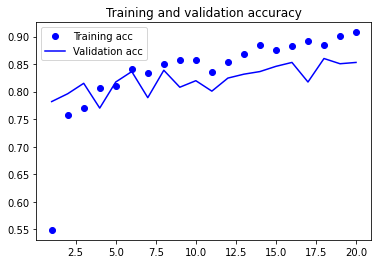

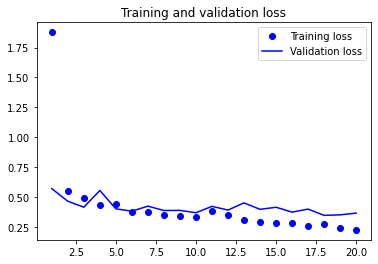

In [ ]:
accuracy_plots(hist_model_8)

We conclude that the best number of filters is 96

## 5.1. Model IX - Dropout 0.2

In [ ]:
# Sequential model | Create linear stack of layers
model_9 = Sequential()

# Convolutional layer | Conv2D
model_9.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_9.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_9.add(Flatten())
model_9.add(Dropout(0.2))
# Hidden layer
model_9.add(Dense(32, activation='relu'))
# Output layer
model_9.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_9.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_9.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16822304  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 16,825,025
Trainable params: 16,825,025
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_9=model_9.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/43 [=====>........................] - ETA: 38s - loss: 9.1336 - accuracy: 0.5265

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 5.3917 - accuracy: 0.5564 - val_loss: 0.4704 - val_accuracy: 0.8175
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.4534 - accuracy: 0.8046 - val_loss: 0.4756 - val_accuracy: 0.8081
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.4045 - accuracy: 0.8204 - val_loss: 0.4133 - val_accuracy: 0.8104
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.3954 - accuracy: 0.8300 - val_loss: 0.3756 - val_accuracy: 0.8365
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.3251 - accuracy: 0.8649 - val_loss: 0.4112 - val_accuracy: 0.8270
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 0.3246 - accuracy: 0.8618 - val_loss: 0.4057 - val_accuracy: 0.8507
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.2815 - accuracy: 0.8817 - val_loss: 0.4051 - val_accuracy: 0.8483
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_9 = pd.DataFrame(hist_model_9.history)
vis_model_9

,loss,accuracy,val_loss,val_accuracy
0,2.640068,0.620279,0.470408,0.817536
1,0.452100,0.802380,0.475556,0.808057
2,0.401910,0.824108,0.413323,0.810427
3,0.373852,0.840145,0.375558,0.836493
4,0.336395,0.851526,0.411211,0.827014
5,0.329982,0.857217,0.405740,0.850711
6,0.289257,0.881014,0.405111,0.848341
7,0.281396,0.883083,0.358207,0.855450
8,0.277550,0.876875,0.378025,0.841232
9,0.243409,0.899393,0.386900,0.838863


In [ ]:
# predictions
Y_pred_model_9 = model_9.predict_generator(validation_set, len(validation_set)) 

# changing the result as True and False
Y_pred_model_9 = (Y_pred_model_9>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_9)

Confusion matrix
[[189  22]
 [ 38 173]]


In [ ]:
classification_report(validation_set, Y_pred_model_9)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.90      0.86       211
        Mask       0.89      0.82      0.85       211

    accuracy                           0.86       422
   macro avg       0.86      0.86      0.86       422
weighted avg       0.86      0.86      0.86       422



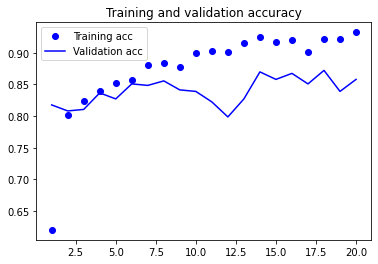

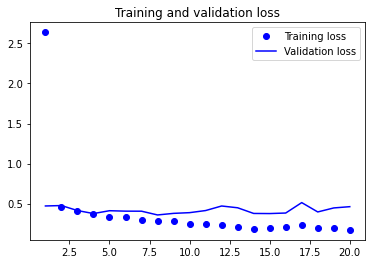

In [ ]:
accuracy_plots(hist_model_9)

## 5.2. Model X - Dropout 0.25

In [ ]:
# Sequential model | Create linear stack of layers
model_10 = Sequential()

# Convolutional layer | Conv2D
model_10.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_10.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_10.add(Flatten())
model_10.add(Dropout(0.25))
# Hidden layer
model_10.add(Dense(32, activation='relu'))
# Output layer
model_10.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_10.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_10.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                16822304  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 16,825,025
Trainable params: 16,825,025
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# fitting the model
Epochs = 20

hist_model_10=model_10.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 5/43 [==>...........................] - ETA: 44s - loss: 9.3049 - accuracy: 0.4627

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 62s 1s/step - loss: 4.5616 - accuracy: 0.6040 - val_loss: 0.4260 - val_accuracy: 0.8033
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 0.4123 - accuracy: 0.8344 - val_loss: 0.3956 - val_accuracy: 0.8128
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 0.4858 - accuracy: 0.7553 - val_loss: 0.3842 - val_accuracy: 0.8294
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.3578 - accuracy: 0.8500 - val_loss: 0.3842 - val_accuracy: 0.8318
Epoch 5/20
43/43 [==============================] - 61s 1s/step - loss: 0.3282 - accuracy: 0.8588 - val_loss: 0.3646 - val_accuracy: 0.8294
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 0.3005 - accuracy: 0.8789 - val_loss: 0.3713 - val_accuracy: 0.8270
Epoch 7/20
43/43 [==============================] - 62s 1s/step - loss: 0.2900 - accuracy: 0.8855 - val_loss: 0.3676 - val_accuracy: 0.8531
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_10 = pd.DataFrame(hist_model_10.history)
vis_model_10

,loss,accuracy,val_loss,val_accuracy
0,2.081474,0.688050,0.425973,0.803318
1,0.440553,0.808588,0.395576,0.812796
2,0.438078,0.801345,0.384239,0.829384
3,0.354731,0.846870,0.384219,0.831754
4,0.330355,0.858769,0.364589,0.829384
5,0.315395,0.864977,0.371291,0.827014
6,0.279448,0.885153,0.367591,0.853081
7,0.276635,0.882049,0.336834,0.867299
8,0.253819,0.897051,0.404953,0.843602
9,0.298967,0.874806,0.325914,0.864929


In [ ]:
# predictions

Y_pred_model_10 = model_10.predict_generator(validation_set, len(validation_set))

# changing the result as True and False
Y_pred_model_10 = (Y_pred_model_10>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_10)

Confusion matrix
[[156  55]
 [ 16 195]]


In [ ]:
classification_report(validation_set, Y_pred_model_10)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.91      0.74      0.81       211
        Mask       0.78      0.92      0.85       211

    accuracy                           0.83       422
   macro avg       0.84      0.83      0.83       422
weighted avg       0.84      0.83      0.83       422



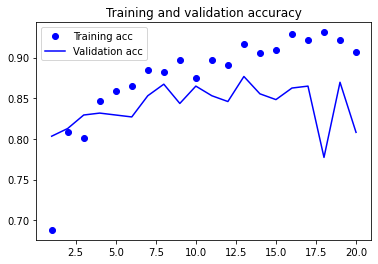

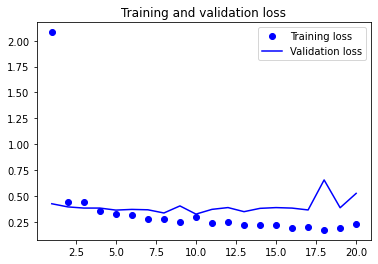

In [ ]:
accuracy_plots(hist_model_10)

## 5.3. Model XI - Dropout 0.30

In [ ]:
# Sequential model | Create linear stack of layers
model_11 = Sequential()

# Convolutional layer | Conv2D
model_11.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_11.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_11.add(Flatten())
model_11.add(Dropout(0.30))
# Hidden layer
model_11.add(Dense(32, activation='relu'))
# Output layer
model_11.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_11.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_11.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                16822304  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 16,825,025
Trainable params: 16,825,025
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_11=model_11.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 3/43 [=>............................] - ETA: 51s - loss: 8.9230 - accuracy: 0.5857

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 4.2404 - accuracy: 0.5441 - val_loss: 0.6596 - val_accuracy: 0.6256
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 0.6377 - accuracy: 0.6564 - val_loss: 0.5393 - val_accuracy: 0.8104
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 0.5379 - accuracy: 0.7717 - val_loss: 0.5232 - val_accuracy: 0.8175
Epoch 4/20
43/43 [==============================] - 61s 1s/step - loss: 0.5435 - accuracy: 0.7936 - val_loss: 0.4953 - val_accuracy: 0.8412
Epoch 5/20
43/43 [==============================] - 61s 1s/step - loss: 0.5083 - accuracy: 0.7940 - val_loss: 0.4660 - val_accuracy: 0.8175
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 0.4878 - accuracy: 0.7760 - val_loss: 0.3972 - val_accuracy: 0.8199
Epoch 7/20
43/43 [==============================] - 62s 1s/step - loss: 0.3559 - accuracy: 0.8460 - val_loss: 0.4221 - val_accuracy: 0.8033
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_11 = pd.DataFrame(hist_model_11.history)
vis_model_11

,loss,accuracy,val_loss,val_accuracy
0,1.944459,0.576824,0.659640,0.625592
1,0.603282,0.705122,0.539306,0.810427
2,0.536482,0.782204,0.523241,0.817536
3,0.539879,0.777548,0.495287,0.841232
4,0.502976,0.792033,0.465989,0.817536
5,0.460540,0.789964,0.397169,0.819905
6,0.361855,0.832902,0.422068,0.803318
7,0.349878,0.845318,0.360966,0.824645
8,0.341425,0.860838,0.359041,0.831754
9,0.344020,0.858251,0.390433,0.834123


In [ ]:
# predictions
Y_pred_model_11 = model_11.predict_generator(validation_set, len(validation_set)) 

# changing the result as True and False
Y_pred_model_11 = (Y_pred_model_11>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_11)

Confusion matrix
[[160  51]
 [ 19 192]]


In [ ]:
classification_report(validation_set, Y_pred_model_11)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.89      0.76      0.82       211
        Mask       0.79      0.91      0.85       211

    accuracy                           0.83       422
   macro avg       0.84      0.83      0.83       422
weighted avg       0.84      0.83      0.83       422



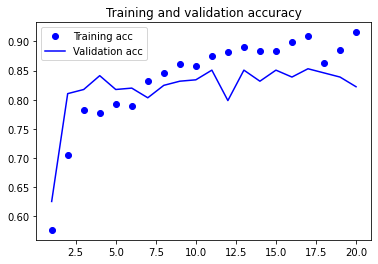

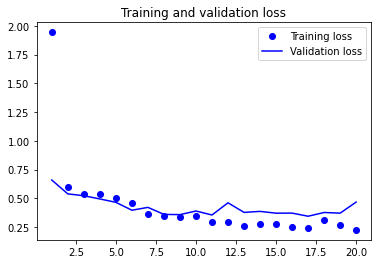

In [ ]:
accuracy_plots(hist_model_11)

## 5.4. Model XII - Dropout 0.50

In [ ]:
# Sequential model | Create linear stack of layers
model_12 = Sequential()

# Convolutional layer | Conv2D
model_12.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_12.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_12.add(Flatten())
model_12.add(Dropout(0.50))
# Hidden layer
model_12.add(Dense(32, activation='relu'))
# Output layer
model_12.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_12.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_12.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                16822304  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 16,825,025
Trainable params: 16,825,025
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_12=model_12.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
 7/43 [===>..........................] - ETA: 56s - loss: 3.9968 - accuracy: 0.5170

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 61s 1s/step - loss: 2.5089 - accuracy: 0.5555 - val_loss: 0.6202 - val_accuracy: 0.6517
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.5417 - accuracy: 0.7241 - val_loss: 0.4121 - val_accuracy: 0.8223
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.4458 - accuracy: 0.8035 - val_loss: 0.4460 - val_accuracy: 0.7844
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.3922 - accuracy: 0.8312 - val_loss: 0.4609 - val_accuracy: 0.8152
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.3838 - accuracy: 0.8321 - val_loss: 0.4218 - val_accuracy: 0.8128
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 0.3538 - accuracy: 0.8500 - val_loss: 0.3759 - val_accuracy: 0.8318
Epoch 7/20
43/43 [==============================] - 61s 1s/step - loss: 0.3708 - accuracy: 0.8132 - val_loss: 0.4053 - val_accuracy: 0.8294
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_12 = pd.DataFrame(hist_model_12.history)
vis_model_12

,loss,accuracy,val_loss,val_accuracy
0,1.438140,0.579410,0.620191,0.651659
1,0.504940,0.759441,0.412065,0.822275
2,0.443787,0.796172,0.446015,0.784360
3,0.390944,0.829281,0.460905,0.815166
4,0.385865,0.830833,0.421780,0.812796
5,0.379442,0.835489,0.375908,0.831754
6,0.344448,0.847387,0.405305,0.829384
7,0.311037,0.872219,0.391841,0.834123
8,0.361776,0.842214,0.417706,0.812796
9,0.303090,0.869115,0.390600,0.834123


In [ ]:
# predictions
Y_pred_model_12 = model_12.predict_generator(validation_set, len(validation_set))
# changing the result as True and False
Y_pred_model_12 = (Y_pred_model_12>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_12)

Confusion matrix
[[197  14]
 [ 50 161]]


In [ ]:
classification_report(validation_set, Y_pred_model_12)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.80      0.93      0.86       211
        Mask       0.92      0.76      0.83       211

    accuracy                           0.85       422
   macro avg       0.86      0.85      0.85       422
weighted avg       0.86      0.85      0.85       422



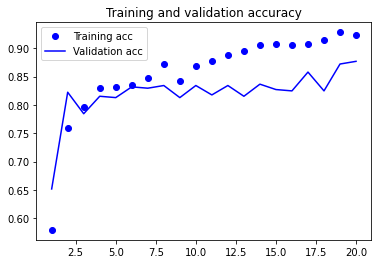

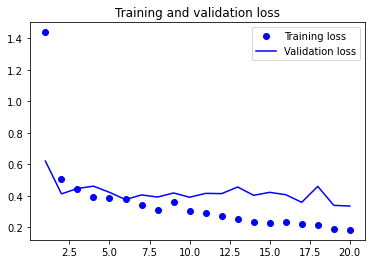

In [ ]:
accuracy_plots(hist_model_12)

We will choose the dropout of 0.30 because it is the one with less overfitting and higher validation accuracy through the various epochs


##6.1. Model XIII - 2 dense layers with 64 and 32

In [ ]:
# Sequential model | Create linear stack of layers
model_13 = Sequential()

# Convolutional layer | Conv2D
model_13.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_13.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_13.add(Flatten())
model_13.add(Dropout(0.3))
# Hidden layer
model_13.add(Dense(64, activation='relu'))
model_13.add(Dense(32, activation='relu'))
# Output layer
model_13.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_13.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_13.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                33644608  
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_model_13=model_13.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 4.5488 - accuracy: 0.5162 - val_loss: 0.5744 - val_accuracy: 0.8104
Epoch 2/20
43/43 [==============================] - 62s 1s/step - loss: 0.5525 - accuracy: 0.7470 - val_loss: 0.4377 - val_accuracy: 0.7962
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 0.4576 - accuracy: 0.7593 - val_loss: 0.3829 - val_accuracy: 0.8389
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.3570 - accuracy: 0.8424 - val_loss: 0.4281 - val_accuracy: 0.8175
Epoch 5/20
43/43 [==============================] - 62s 1s/step - loss: 0.3765 - accuracy: 0.8400 - val_loss: 0.4037 - val_accuracy: 0.8294
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 0.3159 - accuracy: 0.8570 - val_loss: 0.3807 - val_accuracy: 0.8389
Epoch 7/20
43/43 [==============================] - 61s 1s/step - loss: 0.2945 - accuracy: 0.8808 - val_loss: 0.3823 - val_accuracy: 0.8341
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_13 = pd.DataFrame(hist_model_13.history)
vis_model_13

,loss,accuracy,val_loss,val_accuracy
0,2.245245,0.541645,0.574431,0.810427
1,0.516809,0.760993,0.437702,0.796209
2,0.416518,0.811174,0.382912,0.838863
3,0.385204,0.831868,0.428138,0.817536
4,0.365448,0.842731,0.403680,0.829384
5,0.320087,0.855665,0.380712,0.838863
6,0.288132,0.882566,0.382294,0.834123
7,0.288222,0.871702,0.473771,0.817536
8,0.258551,0.902742,0.391182,0.843602
9,0.252957,0.891878,0.389904,0.843602


In [ ]:
# predictions

Y_pred_model_13 = model_13.predict_generator(validation_set, len(validation_set))   

# changing the result as True and False
Y_pred_model_13 = (Y_pred_model_13>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_basic1)

Confusion matrix
[[184  27]
 [ 35 176]]


In [ ]:
classification_report(validation_set, Y_pred_basic)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.84      0.87      0.86       211
        Mask       0.87      0.83      0.85       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



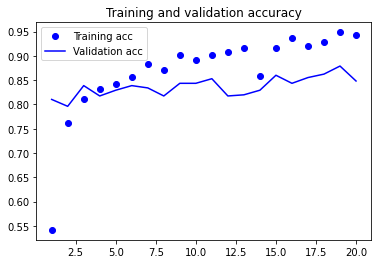

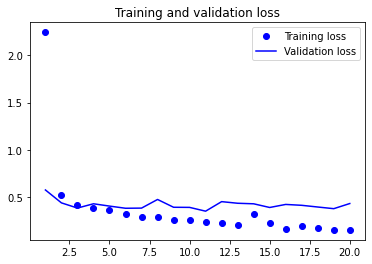

In [ ]:
accuracy_plots(hist_model_13)

# 6.2. Model XIV - Number of neurons = 64

In [ ]:
# Sequential model | Create linear stack of layers
model_14 = Sequential()

# Convolutional layer | Conv2D
model_14.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_14.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_14.add(Flatten())
model_14.add(Dropout(0.3))
# Hidden layer
model_14.add(Dense(64, activation='relu'))
# Output layer
model_14.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_14.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                33644608  
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 33,647,361
Trainable params: 33,647,361
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20


hist_model_14=model_14.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
11/43 [======>.......................] - ETA: 43s - loss: 13.8991 - accuracy: 0.4875

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 8.8878 - accuracy: 0.5260 - val_loss: 0.5097 - val_accuracy: 0.7962
Epoch 2/20
43/43 [==============================] - 62s 1s/step - loss: 0.5468 - accuracy: 0.7220 - val_loss: 0.4474 - val_accuracy: 0.7844
Epoch 3/20
43/43 [==============================] - 62s 1s/step - loss: 0.4361 - accuracy: 0.7956 - val_loss: 0.4098 - val_accuracy: 0.7986
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.3821 - accuracy: 0.8180 - val_loss: 0.4523 - val_accuracy: 0.7891
Epoch 5/20
43/43 [==============================] - 62s 1s/step - loss: 0.3397 - accuracy: 0.8540 - val_loss: 0.3925 - val_accuracy: 0.8412
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 0.3075 - accuracy: 0.8742 - val_loss: 0.3889 - val_accuracy: 0.8460
Epoch 7/20
43/43 [==============================] - 62s 1s/step - loss: 0.3522 - accuracy: 0.8555 - val_loss: 0.3769 - val_accuracy: 0.8389
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_14 = pd.DataFrame(hist_model_14.history)
vis_model_14

,loss,accuracy,val_loss,val_accuracy
0,4.374409,0.563890,0.509738,0.796209
1,0.539133,0.726849,0.447376,0.784360
2,0.413311,0.807553,0.409809,0.798578
3,0.367659,0.832902,0.452254,0.789100
4,0.339142,0.854113,0.392470,0.841232
5,0.313769,0.869633,0.388899,0.845972
6,0.330589,0.864977,0.376872,0.838863
7,0.285268,0.876358,0.427683,0.815166
8,0.256323,0.889809,0.444186,0.827014
9,0.206026,0.914640,0.425070,0.848341


In [ ]:
# predictions
Y_pred_model_14 = model_14.predict_generator(validation_set, len(validation_set))  

# changing the result as True and False
Y_pred_model_14 = (Y_pred_model_14>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_14)

Confusion matrix
[[198  13]
 [ 39 172]]


In [ ]:
classification_report(validation_set, Y_pred_model_14)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.84      0.94      0.88       211
        Mask       0.93      0.82      0.87       211

    accuracy                           0.88       422
   macro avg       0.88      0.88      0.88       422
weighted avg       0.88      0.88      0.88       422



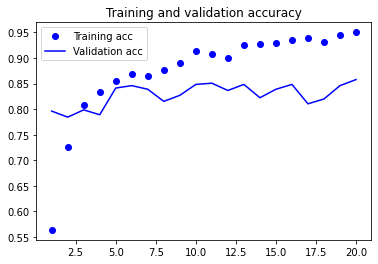

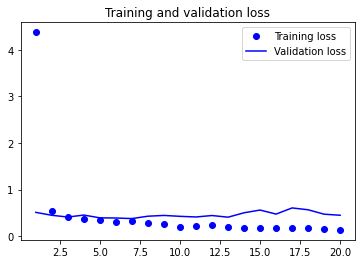

In [ ]:
accuracy_plots(hist_model_14)

##6.3. Model XV - Number of neurons = 128

In [ ]:
# Sequential model | Create linear stack of layers
model_15 = Sequential()

# Convolutional layer | Conv2D
model_15.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_15.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_15.add(Flatten())
model_15.add(Dropout(0.3))
# Hidden layer
model_15.add(Dense(128, activation='relu'))
# Output layer
model_15.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_15.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_15.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               67289216  
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

hist_model_15=model_15.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
15/43 [=========>....................] - ETA: 33s - loss: 8.2471 - accuracy: 0.5363

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 5.2680 - accuracy: 0.5204 - val_loss: 0.6773 - val_accuracy: 0.6351
Epoch 2/20
43/43 [==============================] - 62s 1s/step - loss: 0.6759 - accuracy: 0.6561 - val_loss: 0.5522 - val_accuracy: 0.7536
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 0.5150 - accuracy: 0.7584 - val_loss: 0.4032 - val_accuracy: 0.8081
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.4397 - accuracy: 0.8061 - val_loss: 0.4920 - val_accuracy: 0.7678
Epoch 5/20
43/43 [==============================] - 61s 1s/step - loss: 0.3925 - accuracy: 0.8305 - val_loss: 0.3643 - val_accuracy: 0.8365
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 0.3763 - accuracy: 0.8261 - val_loss: 0.3879 - val_accuracy: 0.8223
Epoch 7/20
43/43 [==============================] - 62s 1s/step - loss: 0.3923 - accuracy: 0.8092 - val_loss: 0.3558 - val_accuracy: 0.8412
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_15 = pd.DataFrame(hist_model_15.history)
vis_model_15

,loss,accuracy,val_loss,val_accuracy
0,2.648391,0.504397,0.677335,0.635071
1,0.660257,0.677703,0.552187,0.753555
2,0.485894,0.774444,0.403192,0.808057
3,0.429239,0.812209,0.491954,0.767772
4,0.375127,0.836006,0.364275,0.836493
5,0.407659,0.815313,0.387927,0.822275
6,0.360257,0.834972,0.355753,0.841232
7,0.324854,0.857734,0.334657,0.841232
8,0.337194,0.864459,0.353620,0.834123
9,0.293790,0.876358,0.344020,0.843602


In [ ]:
# predictions
Y_pred_model_15 = model_15.predict_generator(validation_set, len(validation_set))  

# changing the result as True and False
Y_pred_model_15 = (Y_pred_model_15>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_15)

Confusion matrix
[[202   9]
 [ 47 164]]


In [ ]:
classification_report(validation_set, Y_pred_model_15)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.81      0.96      0.88       211
        Mask       0.95      0.78      0.85       211

    accuracy                           0.87       422
   macro avg       0.88      0.87      0.87       422
weighted avg       0.88      0.87      0.87       422



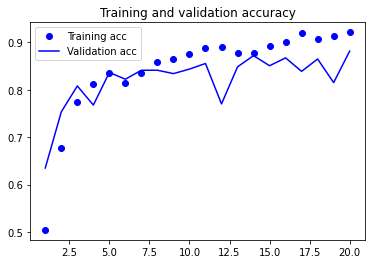

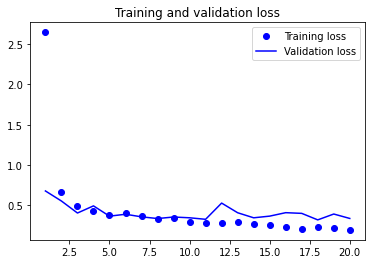

In [ ]:
accuracy_plots(hist_model_15)

Based on these results the best design for the fully conected dense layers is with 128 neurons

## 7.1. Model XVI - Callback  Earlystopping patience=3

In [ ]:
# Sequential model | Create linear stack of layers
model_16 = Sequential()

# Convolutional layer | Conv2D
model_16.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_16.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_16.add(Flatten())
model_16.add(Dropout(0.3))
# Hidden layer
model_16.add(Dense(128, activation='relu'))
# Output layer
model_16.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_16.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67289216  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
____________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", 
                                        patience =3,
                                        verbose=1,  
                                        restore_best_weights = True) 
  


hist_model_16=model_16.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10,  
                         callbacks =[earlystopping]
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
11/43 [======>.......................] - ETA: 5:53 - loss: 12.0818 - accuracy: 0.4895

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 664s 15s/step - loss: 5.5470 - accuracy: 0.5515 - val_loss: 0.4754 - val_accuracy: 0.7536
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.5181 - accuracy: 0.7576 - val_loss: 0.4083 - val_accuracy: 0.7867
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.4549 - accuracy: 0.8052 - val_loss: 0.4640 - val_accuracy: 0.7796
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.4019 - accuracy: 0.8261 - val_loss: 0.3916 - val_accuracy: 0.8128
Epoch 5/20
43/43 [==============================] - 59s 1s/step - loss: 0.4119 - accuracy: 0.8065 - val_loss: 0.3869 - val_accuracy: 0.8318
Epoch 6/20
43/43 [==============================] - 60s 1s/step - loss: 0.3237 - accuracy: 0.8612 - val_loss: 0.3803 - val_accuracy: 0.8389
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.3092 - accuracy: 0.8742 - val_loss: 0.3519 - val_accuracy: 0.8531
Epoch 8/20
43/43 [===========

In [ ]:
vis_model_16 = pd.DataFrame(hist_model_16.history)
vis_model_16

,loss,accuracy,val_loss,val_accuracy
0,2.135586,0.620279,0.475406,0.753555
1,0.487129,0.779617,0.408253,0.786730
2,0.483573,0.785825,0.463982,0.779621
3,0.394898,0.830316,0.391627,0.812796
4,0.388965,0.818934,0.386869,0.831754
5,0.338858,0.848939,0.380296,0.838863
6,0.314952,0.871185,0.351874,0.853081
7,0.314188,0.866011,0.489155,0.819905
8,0.305447,0.864977,0.389289,0.841232
9,0.271081,0.887739,0.343045,0.862559


In [ ]:
# predictions

Y_pred_model_16 = model_16.predict_generator(validation_set, len(validation_set))   

# changing the result as True and False
Y_pred_model_16 = (Y_pred_model_16>0.5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_16)

Confusion matrix
[[186  25]
 [ 39 172]]


In [ ]:
classification_report(validation_set, Y_pred_model_16)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.88      0.85       211
        Mask       0.87      0.82      0.84       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



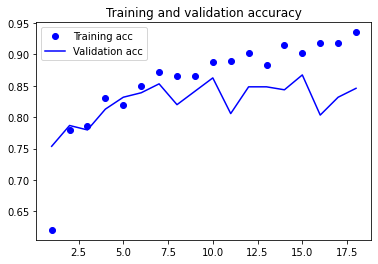

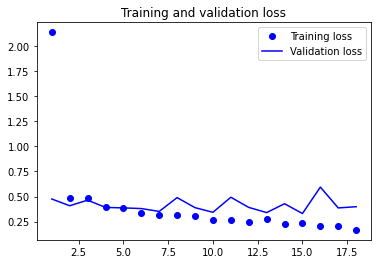

In [ ]:
accuracy_plots(hist_model_16)

## 7.2. Model XVII - Callback  Earlystopping patience=5

In [ ]:
# Sequential model | Create linear stack of layers
model_17 = Sequential()

# Convolutional layer | Conv2D
model_17.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_17.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_17.add(Flatten())
model_17.add(Dropout(0.3))
# Hidden layer
model_17.add(Dense(128, activation='relu'))
# Output layer
model_17.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_17.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_17.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67289216  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
____________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience =5,verbose=1,  
                                          restore_best_weights = True) 
  

hist_model_17=model_17.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10,  callbacks =[earlystopping]
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
26/43 [=================>............] - ETA: 4:02 - loss: 6.6629 - accuracy: 0.5746

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 771s 17s/step - loss: 5.1176 - accuracy: 0.5996 - val_loss: 0.4426 - val_accuracy: 0.8128
Epoch 2/20
43/43 [==============================] - 61s 1s/step - loss: 0.4647 - accuracy: 0.7945 - val_loss: 0.5182 - val_accuracy: 0.7820
Epoch 3/20
43/43 [==============================] - 61s 1s/step - loss: 0.4107 - accuracy: 0.8257 - val_loss: 0.4067 - val_accuracy: 0.8057
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.3677 - accuracy: 0.8319 - val_loss: 0.3980 - val_accuracy: 0.8412
Epoch 5/20
43/43 [==============================] - 62s 1s/step - loss: 0.3055 - accuracy: 0.8682 - val_loss: 0.3976 - val_accuracy: 0.8223
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 0.3940 - accuracy: 0.8285 - val_loss: 0.3804 - val_accuracy: 0.8412
Epoch 7/20
43/43 [==============================] - 61s 1s/step - loss: 0.2908 - accuracy: 0.8738 - val_loss: 0.3916 - val_accuracy: 0.8460
Epoch 8/20
43/43 [===========

In [ ]:
vis_model_17 = pd.DataFrame(hist_model_17.history)
vis_model_17

,loss,accuracy,val_loss,val_accuracy
0,2.449960,0.661148,0.442582,0.812796
1,0.452933,0.792550,0.518166,0.781991
2,0.392306,0.833937,0.406687,0.805687
3,0.358106,0.840662,0.397970,0.841232
4,0.320133,0.863942,0.397634,0.822275
5,0.352276,0.847387,0.380446,0.841232
6,0.297138,0.872737,0.391579,0.845972
7,0.264001,0.892913,0.436309,0.838863
8,0.250390,0.901190,0.380078,0.843602
9,0.450024,0.795137,0.536931,0.779621


In [ ]:
# predictions
Y_pred_model_17 = model_17.predict_generator(validation_set, len(validation_set))   
# changing the result as True and False
Y_pred_model_17 = (Y_pred_model_17>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_17)

Confusion matrix
[[186  25]
 [ 32 179]]


In [ ]:
classification_report(validation_set, Y_pred_model_17)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.85      0.88      0.87       211
        Mask       0.88      0.85      0.86       211

    accuracy                           0.86       422
   macro avg       0.87      0.86      0.86       422
weighted avg       0.87      0.86      0.86       422



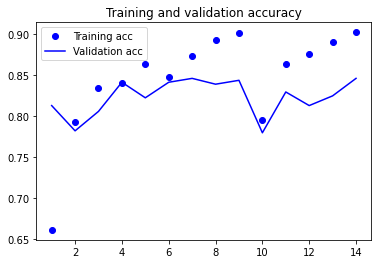

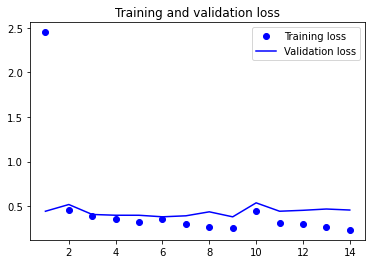

In [ ]:
accuracy_plots(hist_model_17)

## 7.3. Model XVIII - Callback  Earlystopping patience=2

In [ ]:
# Sequential model | Create linear stack of layers
model_18 = Sequential()

# Convolutional layer | Conv2D
model_18.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_18.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_18.add(Flatten())
model_18.add(Dropout(0.3))
# Hidden layer
model_18.add(Dense(128, activation='relu'))
# Output layer
model_18.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_18.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_18.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               67289216  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", 
                                        patience =2,
                                        verbose=1,  
                                        restore_best_weights = True) 
  
hist_model_18=model_18.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10,  
                         callbacks =[earlystopping]
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/43 [========>.....................] - ETA: 39s - loss: 14.5669 - accuracy: 0.4755

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 62s 1s/step - loss: 7.8408 - accuracy: 0.4856 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
43/43 [==============================] - 60s 1s/step - loss: 0.6932 - accuracy: 0.4927 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
43/43 [==============================] - 60s 1s/step - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 4/20
43/43 [==============================] - 60s 1s/step - loss: 0.6719 - accuracy: 0.5353 - val_loss: 0.6144 - val_accuracy: 0.7607
Epoch 5/20
43/43 [==============================] - 60s 1s/step - loss: 0.6286 - accuracy: 0.7375 - val_loss: 0.5588 - val_accuracy: 0.8057
Epoch 6/20
43/43 [==============================] - 61s 1s/step - loss: 0.6118 - accuracy: 0.7426 - val_loss: 0.6269 - val_accuracy: 0.6825
Epoch 7/20
43/43 [==============================] - 60s 1s/step - loss: 0.5293 - accuracy: 0.7421 - val_loss: 0.3998 - val_accuracy: 0.8318
Epoch 8/20
43/43 [=============

In [ ]:
vis_model_18 = pd.DataFrame(hist_model_18.history)
vis_model_18

,loss,accuracy,val_loss,val_accuracy
0,3.307713,0.490394,0.693135,0.500000
1,0.693158,0.500776,0.693142,0.500000
2,0.693077,0.499741,0.689916,0.500000
3,0.663470,0.565960,0.614423,0.760664
4,0.609986,0.758924,0.558762,0.805687
5,0.622067,0.692188,0.626884,0.682464
6,0.493485,0.766684,0.399817,0.831754
7,0.394644,0.828246,0.420530,0.831754
8,0.372203,0.838076,0.396696,0.836493
9,0.353613,0.845836,0.398668,0.834123


In [ ]:
# predictions
Y_pred_model_18 = model_18.predict_generator(validation_set, len(validation_set))  

# changing the result as True and False
Y_pred_model_18 = (Y_pred_model_18>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_18)

Confusion matrix
[[169  42]
 [ 31 180]]


In [ ]:
classification_report(validation_set, Y_pred_model_18)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.84      0.80      0.82       211
        Mask       0.81      0.85      0.83       211

    accuracy                           0.83       422
   macro avg       0.83      0.83      0.83       422
weighted avg       0.83      0.83      0.83       422



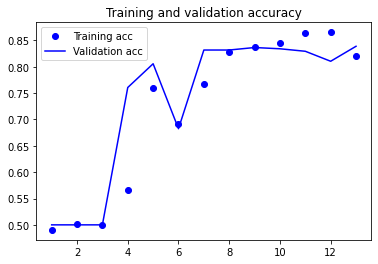

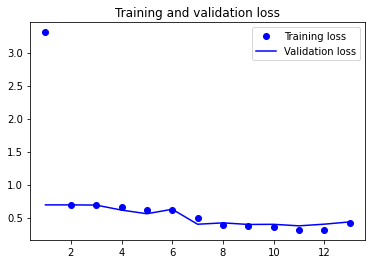

In [ ]:
accuracy_plots(hist_model_18)

## 7.3. Model XIX - Callback  Earlystopping patience=7

In [ ]:
# Sequential model | Create linear stack of layers
model_19 = Sequential()

# Convolutional layer | Conv2D
model_19.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_19.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_19.add(Flatten())
model_19.add(Dropout(0.3))
# Hidden layer
model_19.add(Dense(128, activation='relu'))
# Output layer
model_19.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_19.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_19.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67289216  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
____________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary',
                                                        shuffle = False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 20

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience =7,verbose=1,  
                                          restore_best_weights = True) 
  

hist_model_19=model_19.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10,  callbacks =[earlystopping]
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 1251s 28s/step - loss: 5.6413 - accuracy: 0.5875 - val_loss: 0.4358 - val_accuracy: 0.8104
Epoch 2/20
43/43 [==============================] - 73s 2s/step - loss: 0.4090 - accuracy: 0.8246 - val_loss: 0.4487 - val_accuracy: 0.8009
Epoch 3/20
43/43 [==============================] - 73s 2s/step - loss: 0.4848 - accuracy: 0.7524 - val_loss: 0.3976 - val_accuracy: 0.8128
Epoch 4/20
43/43 [==============================] - 74s 2s/step - loss: 0.3548 - accuracy: 0.8443 - val_loss: 0.3851 - val_accuracy: 0.8270
Epoch 5/20
43/43 [==============================] - 74s 2s/step - loss: 0.3395 - accuracy: 0.8497 - val_loss: 0.4687 - val_accuracy: 0.7938
Epoch 6/20
43/43 [==============================] - 73s 2s/step - loss: 0.2978 - accuracy: 0.8760 - val_loss: 0.4637 - val_accuracy: 0.7915
Epoch 7/20
43/43 [==============================] - 74s 2s/step - loss: 0.2989 - accuracy: 0.8771 - val_loss: 0.3869 - val_accuracy: 0.8460
Epoch 8/20
43/43 [==========

In [ ]:
vis_model_19 = pd.DataFrame(hist_model_19.history)
vis_model_19

,loss,accuracy,val_loss,val_accuracy
0,2.334804,0.661148,0.435817,0.810427
1,0.426719,0.811692,0.448670,0.800948
2,0.453946,0.775479,0.397648,0.812796
3,0.360777,0.842731,0.385073,0.827014
4,0.344201,0.852043,0.468670,0.793839
5,0.292956,0.883083,0.463719,0.791469
6,0.276521,0.883215,0.386854,0.845972
7,0.263633,0.897051,0.465139,0.815166
8,0.287384,0.874806,0.438130,0.843602
9,0.247780,0.901707,0.411396,0.817536


In [ ]:
# predictions
Y_pred_model_19 = model_19.predict_generator(validation_set, len(validation_set)) 

# changing the result as True and False
Y_pred_model_19 = (Y_pred_model_19>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_19)

Confusion matrix
[[183  28]
 [ 37 174]]


In [ ]:
classification_report(validation_set, Y_pred_model_19)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.83      0.87      0.85       211
        Mask       0.86      0.82      0.84       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



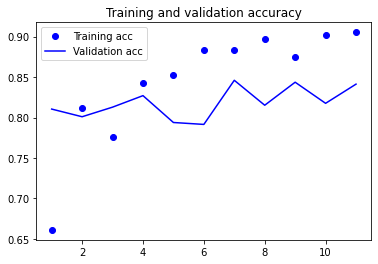

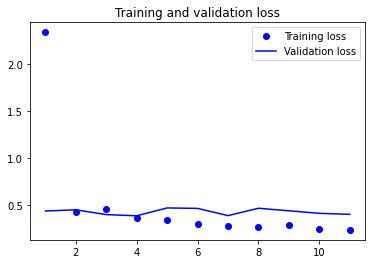

In [ ]:
accuracy_plots(hist_model_19)

Based on these results we should stop the training at 18 epochs, with a patience of 3.

---

---





## 8.1 Model XX - Optimizer - RMSprop optimizer

In [ ]:
# Sequential model | Create linear stack of layers
model_20 = Sequential()

# Convolutional layer | Conv2D
model_20.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_20.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_20.add(Flatten())
model_20.add(Dropout(0.3))
# Hidden layer
model_20.add(Dense(128, activation='relu'))
# Output layer
model_20.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_20.compile(optimizer = 'RMSprop', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_20.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67289216  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
____________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 18

hist_model_20=model_20.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 18,
                         validation_data = validation_set,
                         validation_steps = 10, 
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
11/43 [======>.......................] - ETA: 5:57 - loss: 32.0740 - accuracy: 0.5711

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 693s 16s/step - loss: 15.5638 - accuracy: 0.5540 - val_loss: 0.5115 - val_accuracy: 0.7464
Epoch 2/18
43/43 [==============================] - 61s 1s/step - loss: 0.5530 - accuracy: 0.7397 - val_loss: 0.4789 - val_accuracy: 0.7536
Epoch 3/18
43/43 [==============================] - 61s 1s/step - loss: 0.4531 - accuracy: 0.7922 - val_loss: 0.6785 - val_accuracy: 0.6967
Epoch 4/18
43/43 [==============================] - 61s 1s/step - loss: 0.4792 - accuracy: 0.8023 - val_loss: 0.4194 - val_accuracy: 0.8365
Epoch 5/18
43/43 [==============================] - 61s 1s/step - loss: 0.3968 - accuracy: 0.8259 - val_loss: 0.7487 - val_accuracy: 0.7441
Epoch 6/18
43/43 [==============================] - 61s 1s/step - loss: 0.4285 - accuracy: 0.8136 - val_loss: 0.4283 - val_accuracy: 0.8128
Epoch 7/18
43/43 [==============================] - 61s 1s/step - loss: 0.3589 - accuracy: 0.8467 - val_loss: 0.4238 - val_accuracy: 0.8223
Epoch 8/18
43/43 [==========

In [ ]:
vis_model_20 = pd.DataFrame(hist_model_20.history)
vis_model_20

,loss,accuracy,val_loss,val_accuracy
0,6.022855,0.578893,0.511533,0.746445
1,0.544455,0.752199,0.478867,0.753555
2,0.451626,0.796172,0.678469,0.696682
3,0.441009,0.813761,0.419361,0.836493
4,0.398936,0.827212,0.748707,0.744076
5,0.417464,0.829281,0.428298,0.812796
6,0.367083,0.838593,0.423758,0.822275
7,0.350199,0.853595,0.416458,0.848341
8,0.372691,0.857734,0.490077,0.831754
9,0.319819,0.866011,0.439743,0.855450


In [ ]:
# predictions 

Y_pred_model_20_val = model_20.predict_generator(validation_set, len(validation_set))   

# changing the result as True and False
Y_pred_model_20_val = (Y_pred_model_20_val>0.5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_20_val)

Confusion matrix
[[169  42]
 [ 23 188]]


In [ ]:
classification_report(validation_set, Y_pred_model_20_val)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.88      0.80      0.84       211
        Mask       0.82      0.89      0.85       211

    accuracy                           0.85       422
   macro avg       0.85      0.85      0.85       422
weighted avg       0.85      0.85      0.85       422



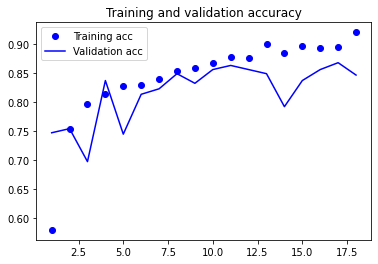

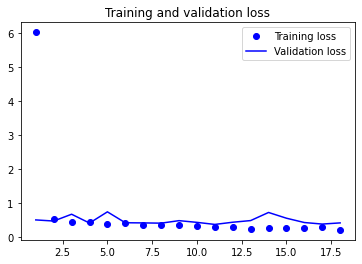

In [ ]:
accuracy_plots(hist_model_20)

## 8.2 Model XXI - Optimizer - Adam optimizer

In [ ]:
# Sequential model | Create linear stack of layers
model_21 = Sequential()

# Convolutional layer | Conv2D
model_21.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_21.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_21.add(Flatten())
model_21.add(Dropout(0.3))
# Hidden layer
model_21.add(Dense(128, activation='relu'))
# Output layer
model_21.add(Dense(1, activation='sigmoid'))

In [ ]:
# compiling the model
model_21.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# visualizing the model structure
model_21.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 96)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 525696)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 525696)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               67289216  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
__________________________________________

In [ ]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
# importing the images

batch_size = 46


training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [ ]:
# fitting the model
Epochs = 18

hist_model_21=model_21.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 18,
                         validation_data = validation_set,
                         validation_steps = 10, 
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18
14/43 [========>.....................] - ETA: 39s - loss: 9.5244 - accuracy: 0.5104

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 63s 1s/step - loss: 5.6642 - accuracy: 0.5497 - val_loss: 0.4511 - val_accuracy: 0.7915
Epoch 2/18
43/43 [==============================] - 61s 1s/step - loss: 0.4691 - accuracy: 0.7864 - val_loss: 0.3900 - val_accuracy: 0.8412
Epoch 3/18
43/43 [==============================] - 62s 1s/step - loss: 0.4009 - accuracy: 0.8142 - val_loss: 0.4335 - val_accuracy: 0.8104
Epoch 4/18
43/43 [==============================] - 61s 1s/step - loss: 0.3599 - accuracy: 0.8446 - val_loss: 0.3943 - val_accuracy: 0.8199
Epoch 5/18
43/43 [==============================] - 61s 1s/step - loss: 0.3567 - accuracy: 0.8473 - val_loss: 0.4311 - val_accuracy: 0.8175
Epoch 6/18
43/43 [==============================] - 61s 1s/step - loss: 0.3204 - accuracy: 0.8645 - val_loss: 0.4528 - val_accuracy: 0.8104
Epoch 7/18
43/43 [==============================] - 61s 1s/step - loss: 0.2863 - accuracy: 0.8827 - val_loss: 0.3721 - val_accuracy: 0.8341
Epoch 8/18
43/43 [=============

In [ ]:
vis_model_21 = pd.DataFrame(hist_model_21.history)
vis_model_21

,loss,accuracy,val_loss,val_accuracy
0,2.633731,0.620797,0.451127,0.791469
1,0.446557,0.797724,0.390002,0.841232
2,0.384888,0.826593,0.433544,0.810427
3,0.368152,0.835489,0.394298,0.819905
4,0.371234,0.840145,0.431096,0.817536
5,0.312587,0.864977,0.452804,0.810427
6,0.268797,0.888774,0.372106,0.834123
7,0.254814,0.893947,0.384958,0.838863
8,0.237080,0.904811,0.393580,0.867299
9,0.277682,0.882566,0.403921,0.848341


In [ ]:
# predictions
Y_pred_model_21_val = model_21.predict_generator(validation_set, len(validation_set))    

# changing the result as True and False
Y_pred_model_21_val = (Y_pred_model_21_val>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


##### Prediction assessment

In [ ]:
confusion_matrix(validation_set.classes, Y_pred_model_21_val)

Confusion matrix
[[181  30]
 [ 23 188]]


In [ ]:
classification_report(validation_set, Y_pred_model_21_val)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.89      0.86      0.87       211
        Mask       0.86      0.89      0.88       211

    accuracy                           0.87       422
   macro avg       0.87      0.87      0.87       422
weighted avg       0.87      0.87      0.87       422



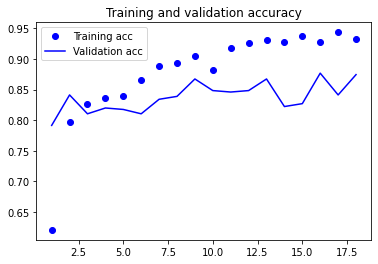

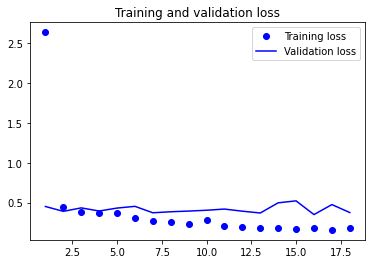

In [ ]:
accuracy_plots(hist_model_21)

The best optimizer is Adam

# Best Model

In [3]:
# Sequential model | Create linear stack of layers
model_final = Sequential()

# Convolutional layer | Conv2D
model_final.add(Conv2D(96, (3, 3), activation='relu', input_shape=(150,150, 3)))
model_final.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model_final.add(Flatten())
model_final.add(Dropout(0.3))
# Hidden layer
model_final.add(Dense(128, activation='relu'))
# Output layer
model_final.add(Dense(1, activation='sigmoid'))

In [4]:
# compiling the model
model_final.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# visualizing the model structure
model_final.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 525696)            0         
_________________________________________________________________
dropout (Dropout)            (None, 525696)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               67289216  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,292,033
Trainable params: 67,292,033
Non-trainable params: 0
____________________________________________

In [6]:
#Data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen=ImageDataGenerator(rescale = 1./255)
# validation and test set only rescaled
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# importing the images

batch_size = 46

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = batch_size,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = batch_size,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [9]:
# fitting the model
Epochs = 18

checkpoint =  callbacks.ModelCheckpoint("model", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

hist_model_final=model_final.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 18,
                         validation_data = validation_set,
                         validation_steps = 10, 
                         callbacks =[checkpoint]
                         )

Epoch 1/18
43/43 [==============================] - 126s 3s/step - loss: 0.3951 - accuracy: 0.8220 - val_loss: 0.5011 - val_accuracy: 0.7725

Epoch 00001: val_accuracy improved from -inf to 0.77251, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 2/18
43/43 [==============================] - 127s 3s/step - loss: 0.3576 - accuracy: 0.8397 - val_loss: 0.3610 - val_accuracy: 0.8318

Epoch 00002: val_accuracy improved from 0.77251 to 0.83175, saving model to model
INFO:tensorflow:Assets written to: model\assets
Epoch 3/18
43/43 [==============================] - 119s 3s/step - loss: 0.3202 - accuracy: 0.8620 - val_loss: 0.4489 - val_accuracy: 0.8223

Epoch 00003: val_accuracy did not improve from 0.83175
Epoch 4/18
43/43 [==============================] - 124s 3s/step - loss: 0.2836 - accuracy: 0.8782 - val_loss: 0.3792 - val_accuracy: 0.8389

Epoch 00004: val_accuracy improved from 0.83175 to 0.83886, saving model to model
INFO:tensorflow:Assets written to: mod

In [10]:
vis_model_final = pd.DataFrame(hist_model_final.history)
vis_model_final

,loss,accuracy,val_loss,val_accuracy
0,0.395110,0.822042,0.501127,0.772512
1,0.357586,0.839737,0.361044,0.831754
2,0.320248,0.861982,0.448895,0.822275
3,0.283605,0.878160,0.379181,0.838863
4,0.259332,0.890293,0.382583,0.867299
5,0.249693,0.902932,0.389747,0.862559
6,0.253312,0.899393,0.394772,0.864929
7,0.221463,0.913549,0.444562,0.841232
8,0.207401,0.917594,0.449141,0.836493
9,0.223804,0.912032,0.415509,0.845972


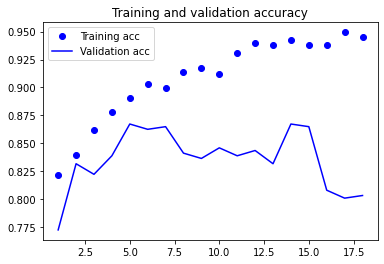

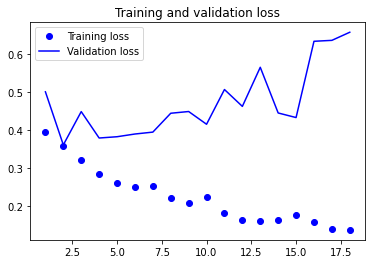

In [13]:
accuracy_plots(hist_model_final)

In [14]:
hist_model_final.params

{'verbose': 1, 'epochs': 18, 'steps': 43}

In [16]:
best_model = models.load_model("model")
#consider using setting the  option on tf.saved_model.LoadOptions to the io_device such as '/job:localhost'.,experimental_io_device='/job:localhost'

In [ ]:
# predictions
Y_pred_best =best_model.predict_generator(validation_set, len(validation_set)) 

# changing the result as True and False
Y_pred_best = (Y_pred_best>0.5)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
best_model.get_weights()

[array([[[[ 0.06100338, -0.06355724, -0.00645488, ..., -0.00494814,
           -0.10639384,  0.05718049],
          [-0.06099279,  0.03686177, -0.03620805, ...,  0.01683892,
           -0.06756556, -0.00500726],
          [ 0.06643628,  0.07162115, -0.01282909, ..., -0.04841022,
            0.0197952 ,  0.03239693]],
 
         [[-0.03027152,  0.03915722, -0.01401555, ..., -0.01833886,
           -0.00346228, -0.03401215],
          [-0.00339006, -0.0815568 , -0.0572163 , ...,  0.07321148,
           -0.05444548, -0.03323955],
          [-0.05516945,  0.02919192,  0.03109584, ..., -0.05705413,
            0.0725082 ,  0.02607818]],
 
         [[-0.07606021,  0.01665962,  0.00052882, ..., -0.05781024,
            0.08831374,  0.04696499],
          [-0.00022884, -0.10103916, -0.06076118, ..., -0.00341187,
            0.03916918, -0.08935662],
          [-0.03201781,  0.0551514 ,  0.03804317, ..., -0.02983635,
           -0.0083718 ,  0.04804998]]],
 
 
        [[[-0.08097699,  0.0249605

In [ ]:
best_model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150, 150, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150, 150, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 96,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'MaxPooling2D',
   'config': {'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'max_p

# 3. Model assessment

In order to assess the model we created, we will focus on 2 different approaches.
- Prediction of unseen data
- Transfer Learning

### 3.1. Prediction of unseen data: the test set

In [24]:
# predictions
Y_pred_best =best_model.predict_generator(test_set, len(test_set))  

# changing the result as True and False
Y_pred_best = (Y_pred_best>0.5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [25]:
confusion_matrix(test_set.classes, Y_pred_best)

Confusion matrix
[[196  15]
 [ 56 155]]


In [26]:
classification_report(test_set, Y_pred_basic)

Classification Report
              precision    recall  f1-score   support

     No Mask       0.78      0.93      0.85       211
        Mask       0.91      0.73      0.81       211

    accuracy                           0.83       422
   macro avg       0.84      0.83      0.83       422
weighted avg       0.84      0.83      0.83       422



### 3.2. Transfer Learning

In order to evaluate our model created from scratch, an objective metric of evaluation could be the comparison of the results obtained with the results of a pre-trained network. 
One of the most important model for computer vision, the VVG19.

In [30]:
# importing the images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (150, 150),
                                                 batch_size = 46,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')

validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (150, 150),
                                                        batch_size = 46,
                                                        color_mode="rgb",
                                                        class_mode = 'binary', 
                                                        shuffle=False)

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (150, 150),
                                            batch_size = 46,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [13]:
# feature extraction of a pre-trained model
img_size = (150, 150)
base_model = VGG19(include_top = False, input_shape = img_size+(3,))
base_model.trainable = False

# combining the VGG19 model and 2 Dense layers
pretrained_model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])
# compiling the model
pretrained_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [14]:
# visualizing the structure of the VGG19
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 21,073,217
Trainable params: 1,048,833
Non-trainable params: 20,024,384
_________________________________________________________________


In [16]:
# setting the callbacks
checkpoint =  callbacks.ModelCheckpoint('/content/gdrive/MyDrive/Project Deeplearning', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [18]:
# fitting the model
batch_size = 46

pre_trained_hist = pretrained_model.fit_generator(training_set,
                         steps_per_epoch = math.floor(len(training_set.classes) / batch_size),
                         epochs = 18,
                         validation_data = validation_set,
                         validation_steps = 10, 
                         callbacks =[checkpoint]
                         )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/18


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


43/43 [==============================] - 792s 18s/step - loss: 0.8832 - binary_accuracy: 0.6801 - val_loss: 0.3027 - val_binary_accuracy: 0.8673
Epoch 2/18
43/43 [==============================] - 54s 1s/step - loss: 0.2115 - binary_accuracy: 0.9242 - val_loss: 0.2223 - val_binary_accuracy: 0.9100
Epoch 3/18
43/43 [==============================] - 54s 1s/step - loss: 0.1263 - binary_accuracy: 0.9523 - val_loss: 0.1778 - val_binary_accuracy: 0.9289
Epoch 4/18
43/43 [==============================] - 54s 1s/step - loss: 0.0866 - binary_accuracy: 0.9765 - val_loss: 0.1726 - val_binary_accuracy: 0.9336
Epoch 5/18
43/43 [==============================] - 54s 1s/step - loss: 0.0534 - binary_accuracy: 0.9874 - val_loss: 0.1615 - val_binary_accuracy: 0.9455
Epoch 6/18
43/43 [==============================] - 54s 1s/step - loss: 0.0435 - binary_accuracy: 0.9901 - val_loss: 0.1505 - val_binary_accuracy: 0.9526
Epoch 7/18
43/43 [==============================] - 54s 1s/step - loss: 0.0300 - bina

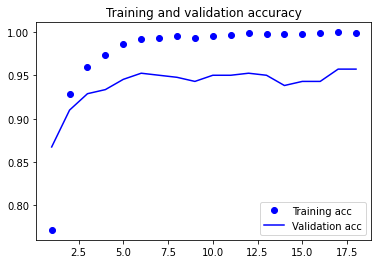

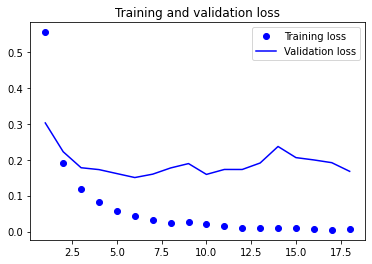

In [19]:
accuracy_plots(pre_trained_hist)

In [20]:
Y_pred = pretrained_model.predict(test_set, len(validation_set))

# changing the result as True and False
Y_pred = (Y_pred>0.5)

In [21]:
confusion_matrix(test_set.classes, Y_pred)

Classification Report
              precision    recall  f1-score   support

        Mask       0.97      0.95      0.96       211
     No Mask       0.95      0.97      0.96       211

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422



Text(33.0, 0.5, 'Actual')

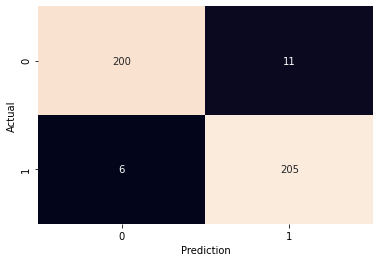

In [22]:
# confusion matrix
sns.heatmap(confusion_matrix(validation_set.classes, Y_pred), annot=True, cbar=False, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')